<a href="https://colab.research.google.com/github/eunsour/Deep-Learning-from-Scratch/blob/main/Chapter%2005/Ch5_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4장에서 신경망의 학습에 대해서 학습하였다.
- 이때 신경망의 가중치 매개변수의 기울기 (정확히는 가중치 매개변수에 대한 손실 함수의 기울기)는 수치 미분을 사용해 구했다. 
- 수치 미분은 단순하고 구현하기도 쉽지만 계산 시간이 오래 걸린다.
- 5장에서는 가중치 매개변수의 기울기를 효율적으로 계산하는 **오차역전파법(Backpropagation)**을 배워본다.

오차역전파법을 제대로 이해하는 방법은 두 가지가 있을 것이다.
1. 수식을 통한 방법 (일반적인 방법)
2. 계산 그래프를 통한 방법
</br>이번 장에서는 계산 그래프를 사용해서 '시각적'으로 이해해본다.

# 5.1 계산 그래프
**계산 그래프(Computational Graph)**는 계산 과정을 그래프로 나타낸 것이다. <br>
여기에서의 그래프는 우리가 잘 아는 그래프 자료구조로, 복수의 **노드**와 **에지**로 표현된다.

## 5.1.1 계산 그래프로 풀다.
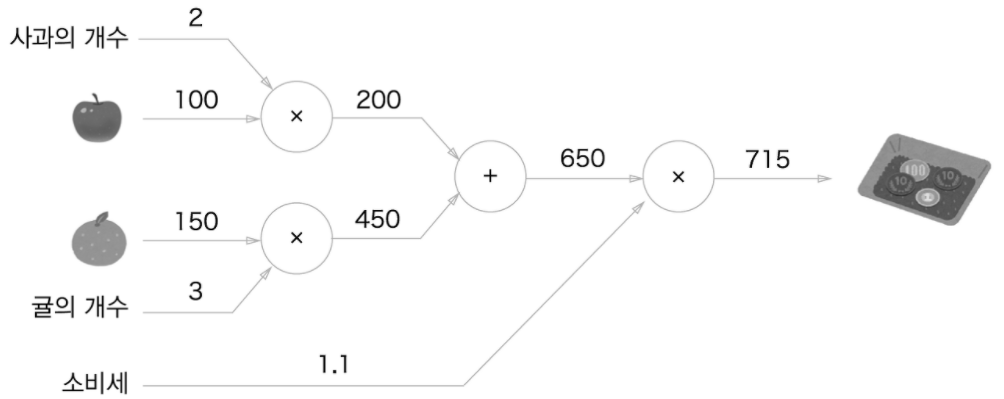
1. 계산 그래프로 구성한다.
2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다. (순전파)
    - 오른쪽에서 왼쪽의 전파를 **역전파**라고 한다.


## 5.1.2 국소적 계산
- 계산 그래프의 특징은 '국소적 계산'을 전파함으로써 최종 결과를 얻는다는 점에 있다.
- 국소적이란 '자신과 직접 관계된 작은 범위'라는 뜻이다.
- 국소적 계산은 결국 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 결과를 출력할 수 있다는 뜻이다.
- 전체 계산이 제아무리 복잡하더라도 각 단계에서 하는 일은 해당 노드의 **'국소적 계산'**이다. 

## 5.1.3 왜 계산 그래프로 푸는가?
1. 계산 그래프의 이점은 무엇일까?
    - 첫 번째는 국소적 계산이다. 전체가 아무리 복잡해도 각 노드에서는 단순한 계산에 집중하여 문제를 단순화할 수 있다.
    - 또 다른 이점으로, 계산 그래프는 중간 계산 결과를 모두 보관할 수 있다. 
    - 실제 계산 그래프를 사용하는 가장 큰 이유는 역전파를 통해 **미분**을 효율적으로 계산할 수 있는 점에 있다.
2. 위의 문제 1에서 가령 사과 가격이 오르면 최종 금액에 어떤 영향을 끼치는지 알아보자 
    - 이는 '사과 가격에 대한 지불 금액의 미분'을 구하는 문제에 해당한다.
    - 결과는 계산 그래프 상의 역전파에 의해서 미분을 구할 수 있다.
    -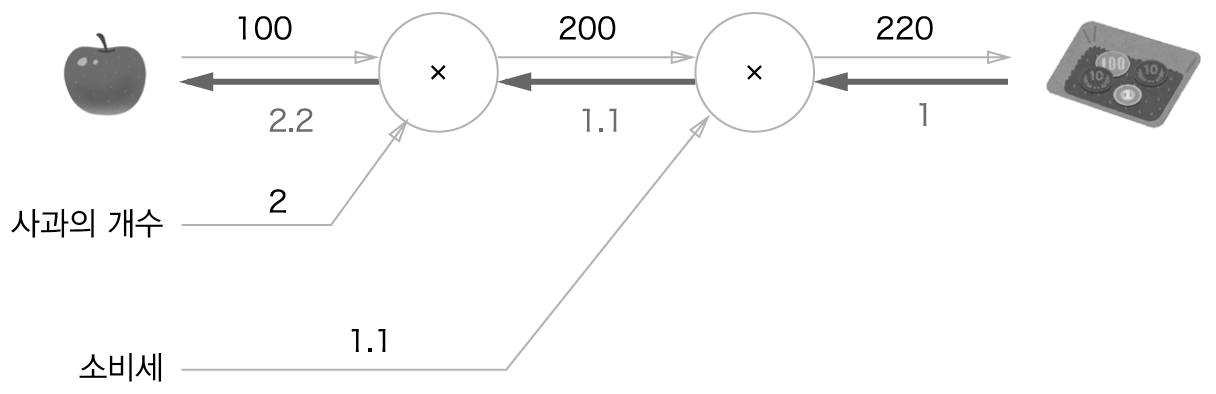
    - 이 전파는 국소적 미분을 전달하고 그 미분 값을 오른쪽에서 왼쪽으로 전달한다. 
    - 이처럼 계산 그래프의 이점은 순전파와 역전파를 활용해서 각 변수의 미분을 효율적으로 구할 수 있다는 것이다.

# 5.2 연쇄법칙
- 국소적 미분을 전달하는 원리는 **연쇄법칙(Chain Rule)**에 따른 것이다. 

## 5.2.1 계산 그래프의 역전파
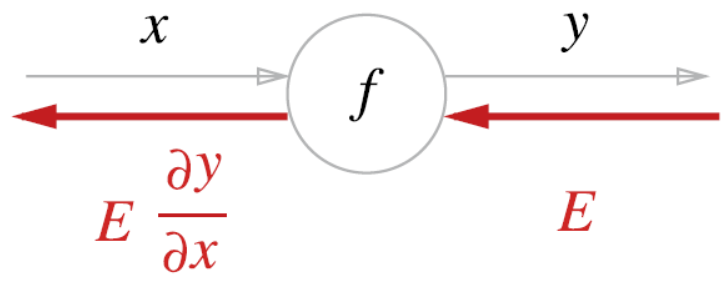
- 위 그림은 y=f(x)라는 계산의 역전파를 그림으로 그린 것이다.
- 그림과 같이 역전파의 계산 절차는 신호 E에 노드의 국소적 미분을 곱한 후 다음 노드로 전달하는 것이다. 
- 이러한 방식을 따르면 목표로 하는 미분 값을 효율적으로 구할 수 있다는 것이 이 전파의 핵심이다.

## 5.2.2 연쇄법칙이란?
연쇄법칙을 설명하려면 우선 합성 함수 이야기부터 시작해야 한다.
- **합성 함수**란 여러 함수로 구성된 함수이다. 예를 들어 z = (x+y)^2이라는 식은 두 개의 식으로 구성된다.
    - z = t^2
    - t = x + y

</br>연쇄 법칙은 합성 함수의 미분에 대한 성질이며, 다음과 같이 정의된다. 
- 함성 합수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.

## 5.2.3 연쇄법칙과 계산 그래프
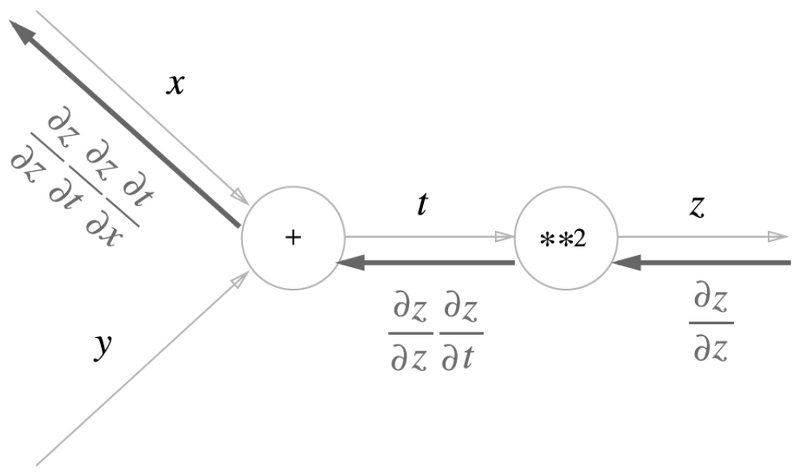
- 순전파와는 반대 방향으로 국소적 미분을 곱하여 전달한다.

# 5.3 역전파

## 5.3.1 덧셈 노드의 역전파